# ft_linear_regression

The first program will be used to predict the price of a car for a given mileage.<br>
When you launch the program, it should prompt you for a mileage, and then give<br>
you back the estimated price for that mileage. The program will use the following<br>
hypothesis to predict the price :<br>
_estimatePrice(mileage) = θ 0 + (θ 1 ∗ mileage)_ <br>
Before the run of the training program, theta0 and theta1 will be set to 0.<br>

Так, это классическая формула Y = W0 +W1X, где W0  - смещение по оси X, а W1 - угол наклона. Но чтобы это заработало, нужно сначала обучить модель


The second program will be used to train your model. It will read your dataset  
file and perform a linear regression on the data.  
Once the linear regression has completed, you will save the variables theta0 and  
theta1 for use in the first program.  

А это именно формула метода наименьших квадратов.
Начнём с либ

In [175]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

In [176]:
data = pd.read_csv('data.csv') #загнали данные

In [177]:
data = data.sort_values(['km'])
data #сортирнули - чтобы видеть, есть ли зависимость

,km,price
22,22899,7990
16,48235,6900
20,54000,7990
18,60949,7490
23,61789,8290
11,63060,6390
19,65674,7555
14,67000,6800
21,68500,7990
12,74000,6600


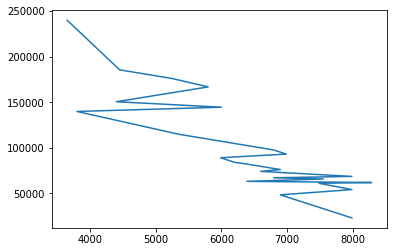

In [178]:

plt.plot( data['price'], data['km'])

In [223]:

SigmaXY = sum(data['price']*data['km'])


In [224]:
SigmaX_SigmaY = (sum(data['price'])*sum(data['km']))/len(data)

In [231]:
Slope = (SigmaXY - SigmaX_SigmaY)/(sum(data['km']**2) - (sum(data['km'])**2/len(data)))

In [232]:
Intercept = (sum(data['price'])/len(data)) - Slope*(sum(data['km'])/len(data))

In [233]:
print(Slope)

-0.021448963591702303


In [253]:
x = 80000
Regression = Intercept + Slope*x

In [254]:
print(Regression)

6783.682562597031


In [236]:
def Regression(data):
     return(Intercept + Slope*data)

In [237]:

MSE = sum(((Regression(data['km'])*data['km'] - data['price']))**2)/len(data)

In [238]:
print(MSE)

3.6948990791026054e+17


In [239]:
RMSE = math.sqrt(MSE)

In [240]:
print(RMSE)

607856815.302963


In [241]:
Rsquare = 1 - (sum(((Regression(data['km'])*data['km'] - data['price']))**2))/(sum(data['price'] - (sum(data['price'])/len(data)))**2)

In [250]:
xu = sum(((round(Regression(data['km']),50)*round(data['km'],50) - round(data['price']**2, 50))))

In [251]:
xy = (sum(round(data['price'],50)) - sum(round(data['price'])/len(data),50))**2

In [252]:
print(xu/xy)

0.612781598350647


In [245]:
from sklearn.metrics import r2_score
gav = []
for line in data['km']:
    ret = Regression(line)
    gav.append(ret)

In [249]:
r2_score(data['price'], gav, multioutput='variance_weighted')

0.73297470783149654

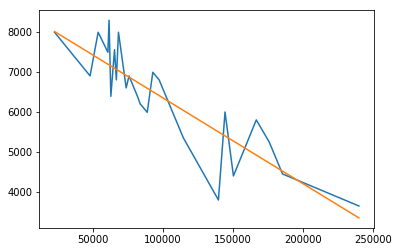

In [247]:
plt.plot( data['km'],data['price'])
plt.plot( data['km'],gav)
plt.show()